<a href="https://colab.research.google.com/github/Mahamat19/Elovvo_projects/blob/main/Task1_Student_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#Load data

In [154]:
# Load the dataset (assume the file is named 'student_scores.csv')
df = pd.read_csv('/content/drive/MyDrive/ML Elevvo/Task1_Student_Score_Factor/StudentPerformanceFactors.csv')

# Display basic info and first few rows
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [155]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [156]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

#Cleaning data and visualization

In [157]:
# Check for missing values
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


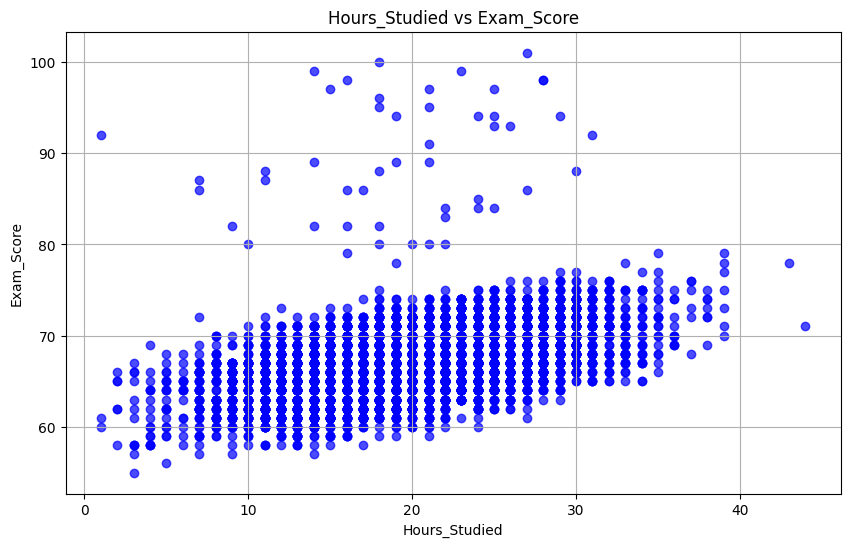

In [158]:
# Visualize the relationship between study hours and scores
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', alpha=0.7)
plt.title('Hours_Studied vs Exam_Score')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.grid(True)
plt.show()

#Splitting data into train and test data

In [159]:
X = df[['Hours_Studied']]  # Feature (study hours)
y = df['Exam_Score']   # Target (exam scores)

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression model

In [160]:
# Initialize and train the model (Training loop for Linear Regression)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Display model coefficients
print(f"Intercept: {linear_model.intercept_:.2f}, Slope: {linear_model.coef_[0]:.2f}")

Intercept: 61.54, Slope: 0.29


#Prediction and Evaluation

In [161]:
# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate performance
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, y_pred)

print(f"MAE: {linear_mae:.2f}")
print(f"MSE: {linear_mse:.2f}")
print(f"RMSE: {linear_rmse:.2f}")
print(f"R² Score: {linear_r2:.2f}")

MAE: 2.44
MSE: 10.54
RMSE: 3.25
R² Score: 0.23


**Comment**: R² Score (Coefficient of Determination): 0.23 about 23% - This metric indicates the proportion of the variance in the dependent variable (Exam Score) that is predictable from the independent variable (Hours Studied). An R² of 0.23 means that about 23% of the variation in exam scores can be explained by the number of hours studied according to this model. A higher R² generally indicates a better fit, with 1 being a perfect fit.
In this case, an R² of 0.23 suggests that 'Hours_Studied' alone doesn't explain a large portion of the variation in 'Exam_Score', implying other factors are likely influencing the scores significantly.



#Visualization of predictions

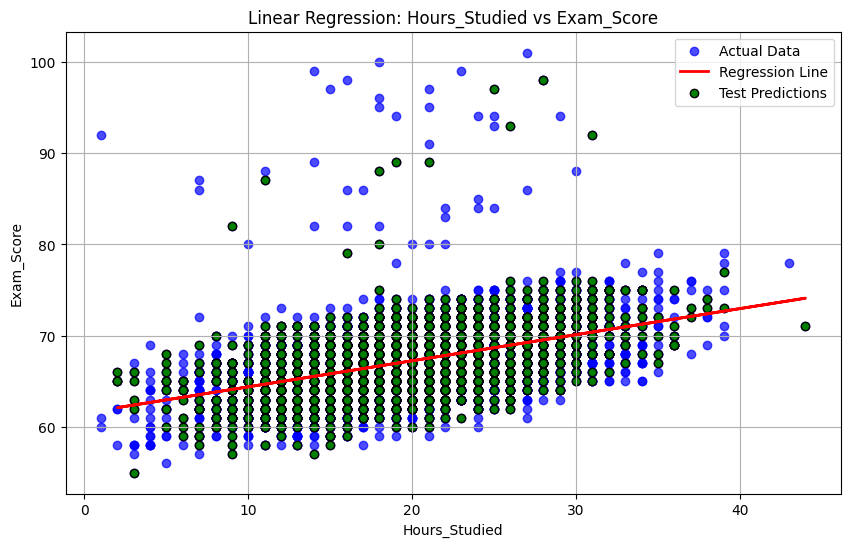

In [162]:
# Plot regression line and test predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.7)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.scatter(X_test, y_test, color='green', label='Test Predictions', edgecolors='black')
plt.title('Linear Regression: Hours_Studied vs Exam_Score')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.legend()
plt.grid(True)
plt.show()

**Comment**: The data show a positive trend between Hours_Studied and Exam_Score, but the relationship is weak and highly noisy (many points lie far from the regression line). This means that linear regression does not explain the variability in scores very well (low predictive power). As showed Coefficient of Determination above, it also suggests that other factors—such as Attendance, Parental_Involvement, Motivation_Level, Teacher_Quality etc —play a significant role in influencing student performance, beyond just the number of Hours_Studied.

#Use Polynomial Regression Models

In [163]:
# Polynomial Regression Models with degrees (2, 3, and 4)
degrees = [2, 3, 4]
poly_models = {}
poly_results = []

for degree in degrees:
    # Create polynomial features and linear regression pipeline
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

    # Train the model
    poly_model.fit(X_train, y_train)

    # Make predictions
    y_pred_poly = poly_model.predict(X_test)

    # Evaluate performance
    poly_mae = mean_absolute_error(y_test, y_pred_poly)
    poly_mse = mean_squared_error(y_test, y_pred_poly)
    poly_rmse = np.sqrt(poly_mse)
    poly_r2 = r2_score(y_test, y_pred_poly)

    # Store results
    poly_models[degree] = poly_model
    poly_results.append({
        'Degree': degree,
        'MAE': poly_mae,
        'MSE': poly_mse,
        'RMSE': poly_rmse,
        'R2': poly_r2
    })

    print(f"\nPolynomial Regression (Degree {degree}) Performance:")
    print(f"MAE: {poly_mae:.2f}")
    print(f"MSE: {poly_mse:.2f}")
    print(f"RMSE: {poly_rmse:.2f}")
    print(f"R² Score: {poly_r2:.4f}")


Polynomial Regression (Degree 2) Performance:
MAE: 2.43
MSE: 10.52
RMSE: 3.24
R² Score: 0.2340

Polynomial Regression (Degree 3) Performance:
MAE: 2.43
MSE: 10.52
RMSE: 3.24
R² Score: 0.2341

Polynomial Regression (Degree 4) Performance:
MAE: 2.44
MSE: 10.55
RMSE: 3.25
R² Score: 0.2323


In [164]:
# Compare all models
comparison_df = pd.DataFrame([{
    'Model': 'Linear Regression',
    'MAE': linear_mae,
    'MSE': linear_mse,
    'RMSE': linear_rmse,
    'R2': linear_r2
}])

for result in poly_results:
    comparison_df = pd.concat([comparison_df, pd.DataFrame([{
        'Model': f'Polynomial (Degree {result["Degree"]})',
        'MAE': result['MAE'],
        'MSE': result['MSE'],
        'RMSE': result['RMSE'],
        'R2': result['R2']
    }])], ignore_index=True)

print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                   Model       MAE        MSE      RMSE        R2
0      Linear Regression  2.436103  10.535841  3.245896  0.233198
1  Polynomial (Degree 2)  2.434220  10.524497  3.244148  0.234023
2  Polynomial (Degree 3)  2.433917  10.522829  3.243891  0.234145
3  Polynomial (Degree 4)  2.435393  10.548696  3.247876  0.232262


**Comment**: The polynomial regression models with degrees 2, 3, and 4 did not significantly improve the performance compared to the simple linear regression model when using only 'Hours_Studied' as a feature. The R² values remain low across all these models, reinforcing the earlier observation that 'Hours_Studied' alone is not a strong predictor of 'Exam_Score', and other factors likely play a much larger role.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


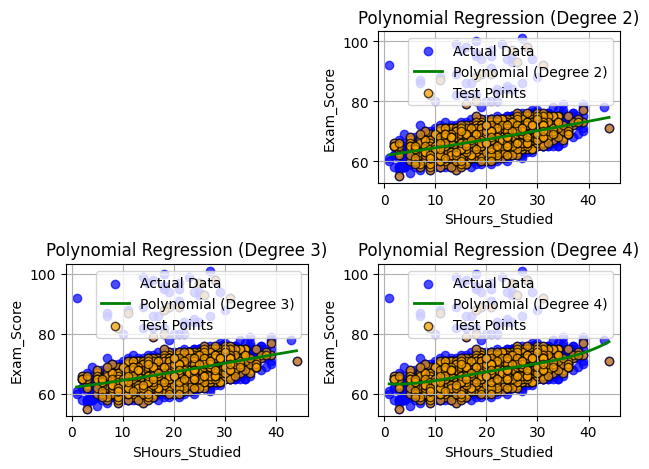

In [165]:
# Plot polynomial regressions
for i, degree in enumerate(degrees, 2):
    plt.subplot(2, 2, i)
    plt.scatter(X, y, color='blue', alpha=0.7, label='Actual Data')

    # Generate predictions for smooth curve
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range = poly_models[degree].predict(X_range)

    plt.plot(X_range, y_range, color='green', linewidth=2,
             label=f'Polynomial (Degree {degree})')
    plt.scatter(X_test, y_test, color='orange', edgecolors='black',
                label='Test Points', alpha=0.7)
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('SHours_Studied')
    plt.ylabel('Exam_Score')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Correlation between features

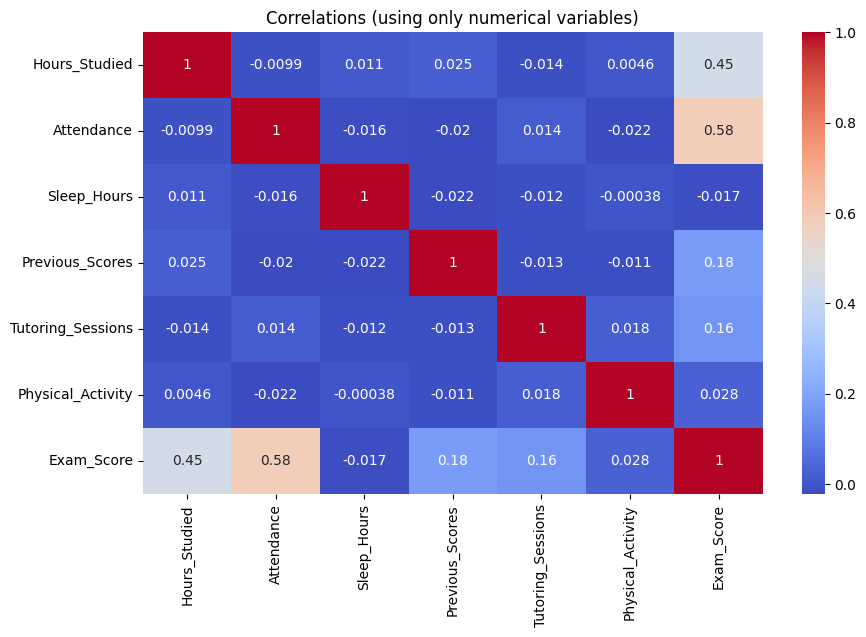

In [166]:
import seaborn as sns

# Garder uniquement les colonnes numériques
corr = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlations (using only numerical variables)")
plt.show()


**Comment**: The Exam_Scores are best predicted by Attendance and Hours_Studied, but the dataset shows that other academic and non-academic factors like Previous_Scores, Tutoring_Sessions, Physical_Activity contribute only weakly.

# Inluding factors affecting Exam_Scores

In [167]:
X = df[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']]
y = df['Exam_Score']   # Target (exam scores)

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression

In [168]:
# Initialize and train the model (Training loop for Linear Regression)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Display model coefficients
print(f"Intercept: {linear_model.intercept_:.2f}, Slope: {linear_model.coef_[0]:.2f}")

Intercept: 40.66, Slope: 0.29


In [169]:
# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate performance
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, y_pred)

print(f"MAE: {linear_mae:.2f}")
print(f"MSE: {linear_mse:.2f}")
print(f"RMSE: {linear_rmse:.2f}")
print(f"R² Score: {linear_r2:.2f}")

MAE: 1.27
MSE: 4.90
RMSE: 2.21
R² Score: 0.64


**Comment**: The much higher R² (64%) score and lower error metrics (MAE, MSE, RMSE) demonstrate that Attendance, Previous_Scores, Tutoring_Sessions, and Physical_Activity are important factors in predicting Exam_Scores, and including them significantly improves the model's performance compared to using 'Hours_Studied' alone.

Text(55, 93.1, 'R² = 0.643\nRMSE = 2.21')

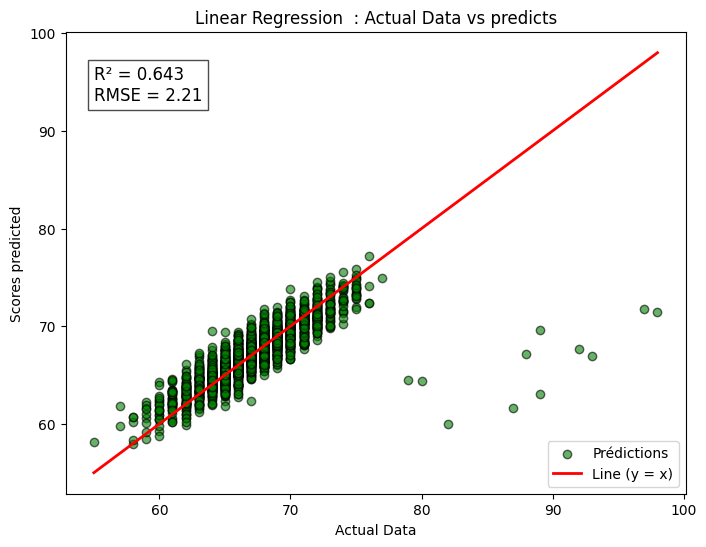

In [170]:
# Scatter Actual Data vs predict with metrics (since there are several variables)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6, edgecolors="black", label="Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linewidth=2, label="Line (y = x)")

plt.xlabel("Actual Data")
plt.ylabel("Scores predicted")
plt.title("Linear Regression  : Actual Data vs predicts")
plt.legend()

# Display metrics
plt.text(y_test.min(), y_test.max()*0.95,
         f"R² = {linear_r2:.3f}\nRMSE = {linear_rmse:.2f}",
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

**Comment**: Now, the linear regression captures much more the general trend than in the previous case using Hours_Studied alone, but it misses extreme values. The relationship is moderately strong (R² ≈ 0.64), but predictions for high scores are not very accurate.

This suggests that other factors (which have not included here) or a nonlinear model might better explain/predict the scores, especially for higher values.

#Use polynomial regression model


Polynomial Regression (Degree 2) Performance:
MAE: 1.28
MSE: 4.91
RMSE: 2.22
R² Score: 0.6426

Polynomial Regression (Degree 3) Performance:
MAE: 1.28
MSE: 4.93
RMSE: 2.22
R² Score: 0.6415

Polynomial Regression (Degree 4) Performance:
MAE: 1.32
MSE: 5.09
RMSE: 2.26
R² Score: 0.6293


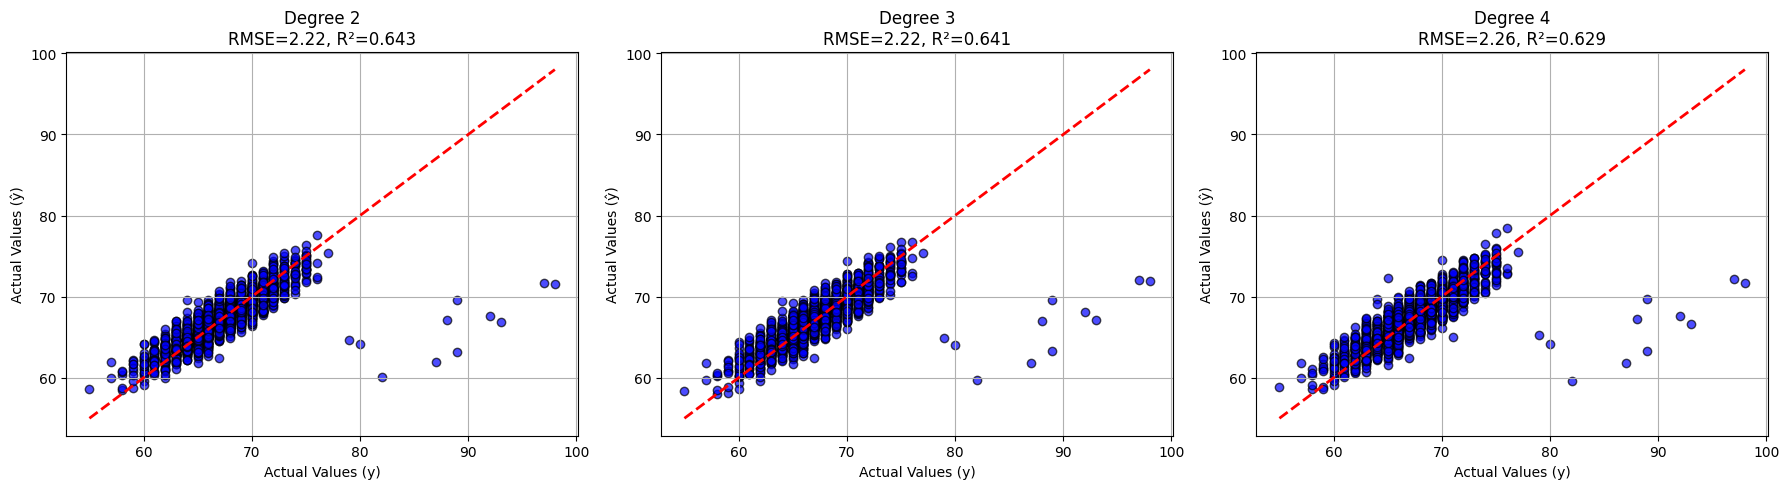

In [171]:
# Polynomial Regression Models with degrees (2, 3, and 4)
degrees = [2, 3, 4]
poly_models = {}
poly_results = []

plt.figure(figsize=(18, 5))

for i, degree in enumerate(degrees, 1):
    # Create polynomial features and linear regression pipeline
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

    # Train the model
    poly_model.fit(X_train, y_train)

    # Make predictions
    y_pred_poly = poly_model.predict(X_test)

    # Evaluate performance
    poly_mae = mean_absolute_error(y_test, y_pred_poly)
    poly_mse = mean_squared_error(y_test, y_pred_poly)
    poly_rmse = np.sqrt(poly_mse)
    poly_r2 = r2_score(y_test, y_pred_poly)

    # Store results
    poly_models[degree] = poly_model
    poly_results.append({
        'Degree': degree,
        'MAE': poly_mae,
        'MSE': poly_mse,
        'RMSE': poly_rmse,
        'R2': poly_r2
    })

    print(f"\nPolynomial Regression (Degree {degree}) Performance:")
    print(f"MAE: {poly_mae:.2f}")
    print(f"MSE: {poly_mse:.2f}")
    print(f"RMSE: {poly_rmse:.2f}")
    print(f"R² Score: {poly_r2:.4f}")

    # --- Plot ---
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred_poly, alpha=0.7, color="blue", edgecolors="black")
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color="red", linestyle="--", linewidth=2)
    plt.title(f"Degree {degree}\nRMSE={poly_rmse:.2f}, R²={poly_r2:.3f}")
    plt.xlabel("Actual Values (y)")
    plt.ylabel("Actual Values (ŷ)")
    plt.grid(True)

plt.tight_layout()
plt.show()


**Comment**: We realise that the best performance is  Polynomial Regression Models with Degree 2 (lowest RMSE, highest R²). But there is no improvement with higher degree like Polynomial with Degree 3 did not help, and Degree 4 made it worse.

We conclude that for this dataset, a quadratic polynomial (degree 2) is the sweet spot. More complexity does not yield better predictions.

#Compare Models

In [172]:
# Compare all models
comparison_df = pd.DataFrame([{
    'Model': 'Linear Regression',
    'MAE': linear_mae,
    'MSE': linear_mse,
    'RMSE': linear_rmse,
    'R2': linear_r2
}])

for result in poly_results:
    comparison_df = pd.concat([comparison_df, pd.DataFrame([{
        'Model': f'Polynomial (Degree {result["Degree"]})',
        'MAE': result['MAE'],
        'MSE': result['MSE'],
        'RMSE': result['RMSE'],
        'R2': result['R2']
    }])], ignore_index=True)

print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                   Model       MAE       MSE      RMSE        R2
0      Linear Regression  1.272046  4.899238  2.213422  0.643432
1  Polynomial (Degree 2)  1.276157  4.910585  2.215984  0.642606
2  Polynomial (Degree 3)  1.282404  4.925908  2.219439  0.641491
3  Polynomial (Degree 4)  1.315026  5.092803  2.256724  0.629344


**Comment**: The best performance among all models is Linear Regression.